<a href="https://colab.research.google.com/github/Tiagee0730/Prediction-of-Product-Sales/blob/main/Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Author : Tia Gee

## Load and Inspect Data
- Import Libraries



In [5]:
# import the pandas libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor

- Mount Google Drive

In [6]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import file to use for DF

In [7]:
# load the data 
filename = '/content/sales_predictions_2023.csv'

In [8]:
# ensuring I can see all columns
df = pd.read_csv('/content/sales_predictions_2023.csv')
pd.get_option('display.max_columns')

20

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pd.set_option('display.max_columns',20)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Clean Data

In [13]:
# How many rows? 
len(df)

8523

In [14]:
# How many columns?
len(df.columns)

12

In [15]:
# What are the datatypes?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there any duplicates?

In [16]:
### remove duplicate data
df.duplicated().sum()

0

- there is not any duplicate data present.

4. Identify missing values

In [17]:
#check for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

identifying percentage of missing data

In [18]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values 
  *there are 1463 missing values in the 'Item_Weight' column (17.16%)*

  *there are 2410 missing values in the 'Outlet_Size' column (28.27%)*

'Item_Weight' and 'Outlet_Size has a considerable amount of missing variables. 
- 'Item_Weight' is a numerical value so I am going to use median to fill in the missing values. 
- 'Outlet_Size is a categorical value so I am going to fill in the missing values with 'Missing'

 Find any inconsistent categories of data and fix them

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Identify the features (X) and the taregt(y):

In [24]:
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
#Instantiate Column Selectors
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [26]:
# Instantiate Column Transformers
# Imputers
freq_imputer = SimpleImputer(missing_values = np.NaN, strategy='constant', fill_value='Missing')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
#Instantiate Pipelines
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [28]:
#Instantiate ColumnTransformer
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aec5e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aecaf0>)])

In [29]:
# fit on train
preprocessor.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aec5e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aecaf0>)])

In [30]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [31]:
# code to use and round to 3 decimal places
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [32]:

df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

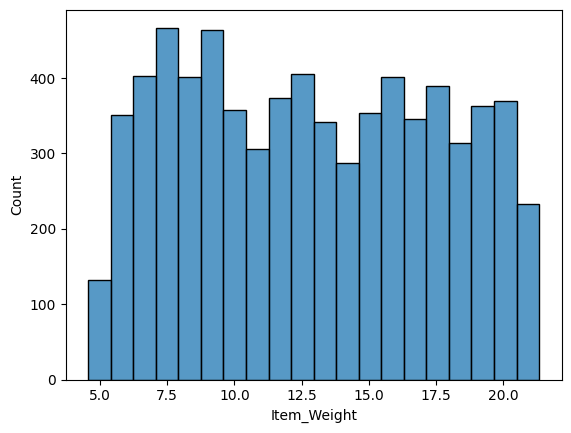

In [33]:

ax = sns.histplot(data = df, x = 'Item_Weight')

In [34]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

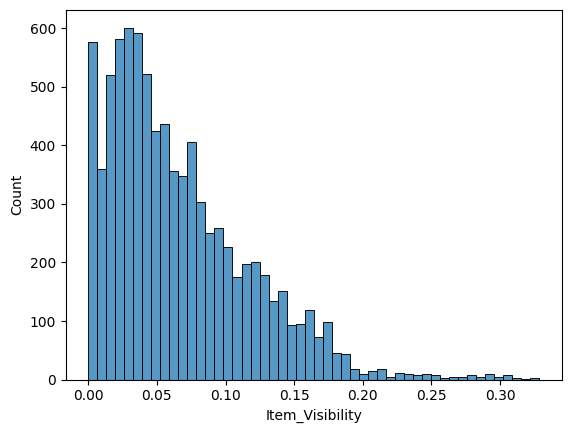

In [35]:
ax = sns.histplot(data = df, x = 'Item_Visibility')

In [36]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

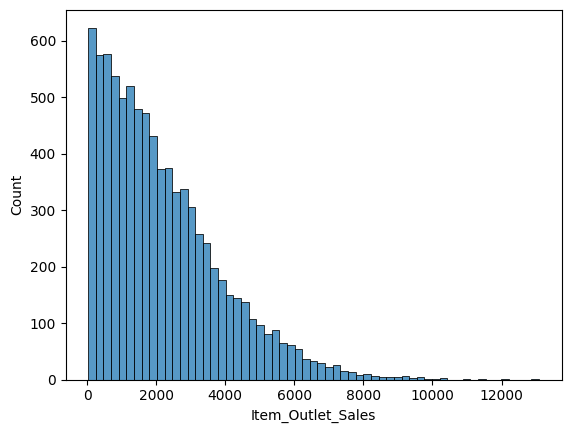

In [37]:
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

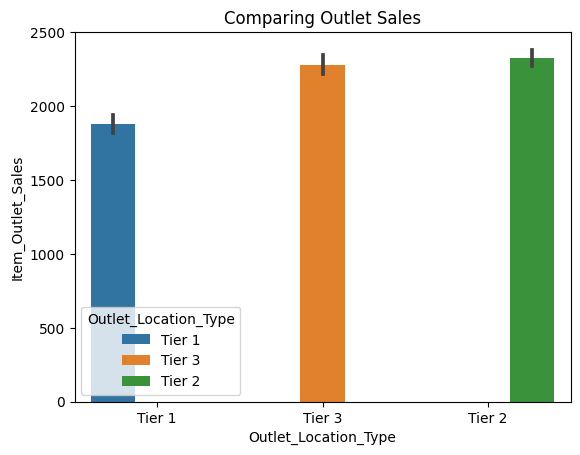

In [38]:
# Using Seaborn to plot
ax = sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
ax.set_title("Comparing Outlet Sales");

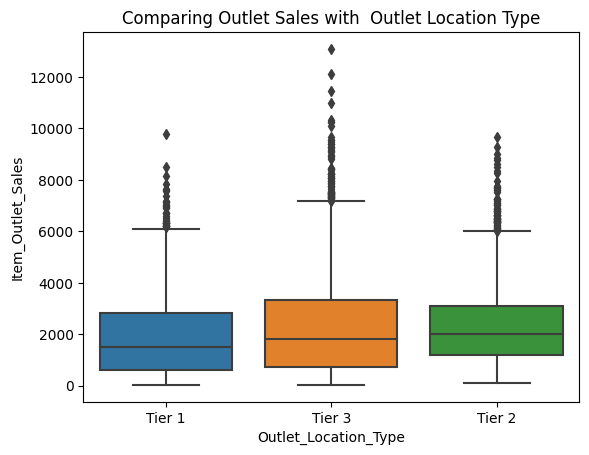

In [39]:

ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data = df)
ax.set_title("Comparing Outlet Sales with  Outlet Location Type");


<ipython-input-40-0ba9b4a518e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'Reds');


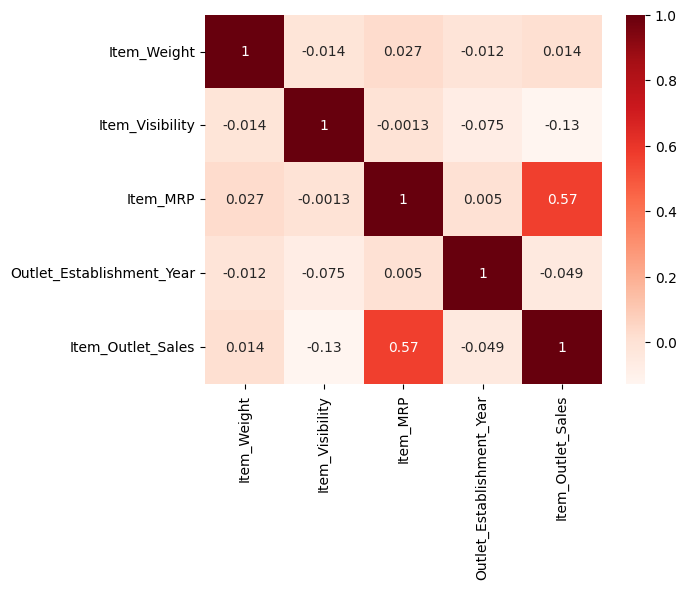

In [40]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds');

## Explanatory Data Analysis

## Build a linear regression model to predict sales
### Build a linear regression model


In [41]:
# Import the model and instantiate the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [43]:
reg_pipe = make_pipeline(preprocessor, reg)

In [44]:
# train the model on the training data
reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aec5e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aecaf0>)])),
                ('linearregression', LinearRegression())])

### Evaluate the performance based on r^2

In [55]:
# create model predictions
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [56]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.561555917352665
Model Testing R2: 0.5678354334123267


### Evaluate performance based on RMSE

In [57]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1139.1030965029472
Model Testing RMSE: 1092.8771481811818


## Build a regression tree to predict sales


#### Build a simple regression model

In [58]:
# make an instance of the model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [59]:
# fit the model to the training data
dec_pipe = make_pipeline(preprocessor, dec_tree)

dec_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aec5e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb611aecaf0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
# predict the target values for training set and the test set
dec_tree_train_preds = dec_pipe.predict(X_train)
dec_tree_test_preds = dec_pipe.predict(X_test)

#### Compare the model based on r^2

In [61]:
dec_tree_train_r2 = np.corrcoef(y_train, dec_tree_train_preds)[0][1]**2
dec_tree_test_r2 = np.corrcoef(y_test, dec_tree_test_preds)[0][1]**2

print(f'Model Training R2: {dec_tree_train_r2}')
print(f'Model Testing R2: {dec_tree_test_r2}')

Model Training R2: 0.9999999999999998
Model Testing R2: 0.3667631826343053


- this data is overfit based on the training being almost perfect, but the testing being only .36.

#### Compare the model based on RMSE

In [53]:
dec_tree_train_RMSE = np.sqrt(np.mean(np.abs(dec_tree_train_preds - y_train)**2))
dec_tree_test_RMSE = np.sqrt(np.mean(np.abs(dec_tree_test_preds - y_test)**2))

print(f'Model Training RMSE: {dec_tree_train_RMSE}')
print(f'Model Testing RMSE: {dec_tree_test_RMSE}')

Model Training RMSE: 4.925864104892086e-15
Model Testing RMSE: 1498.3010906396064


In [62]:
# evaluate the model
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.18632669861646434


## Which model do I recommend?
- the linear model is more consistent, performs better and it has a better RMSE than the decision tree model. 